# Task #2: Prediction using Unsupervised ML
---

# Aim: Predict the optimum no. of clusters and represent it visually

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Read data using pandas

In [2]:
df = pd.read_csv('Iris.csv')
print("Data is successfully imported")
df.head()

Data is successfully imported


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.shape

(150, 6)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Visualization

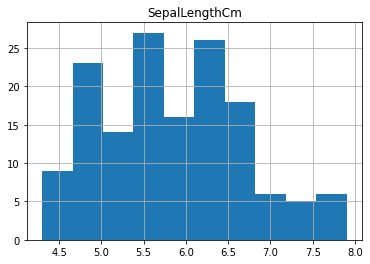

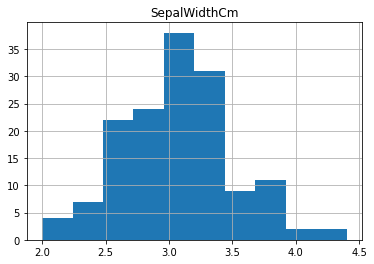

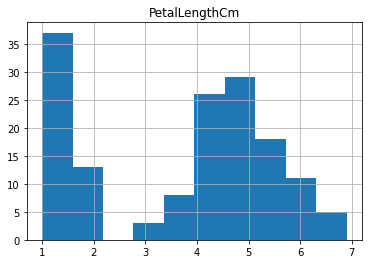

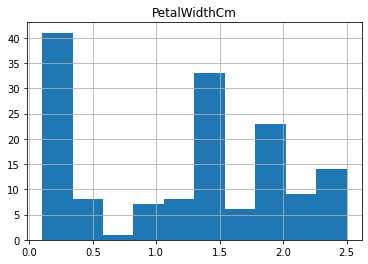

In [8]:
df.hist(column='SepalLengthCm')
df.hist(column='SepalWidthCm')
df.hist(column='PetalLengthCm')
df.hist(column='PetalWidthCm')
plt.show()

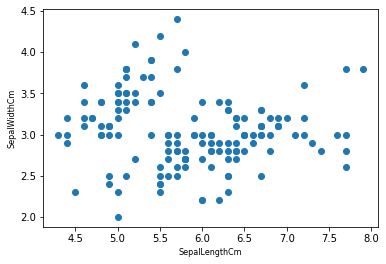

In [9]:
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], cmap = 'rainbow')
plt.xlabel('SepalLengthCm', fontsize=8)
plt.ylabel('SepalWidthCm', fontsize=8)
plt.show()

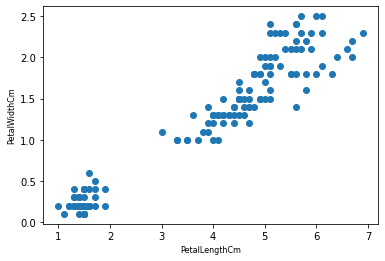

In [10]:
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], cmap = 'gist_rainbow')
plt.xlabel('PetalLengthCm', fontsize=8)
plt.ylabel('PetalWidthCm', fontsize=8)
plt.show()

### Finding the Optimum No. Of Clusters for K-Means classification using Elbow Method

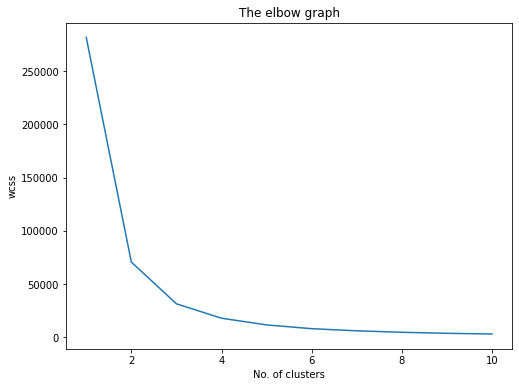

In [11]:
from sklearn.cluster import KMeans
# Finding the optimum number of clusters for k-means classification
iris_df = df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)
    
# Plotting The elbow Method
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss)
plt.title('The elbow graph')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

### Training the model

In [12]:
# Applying kmeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_df)

In [13]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### Visualization using Kmeans

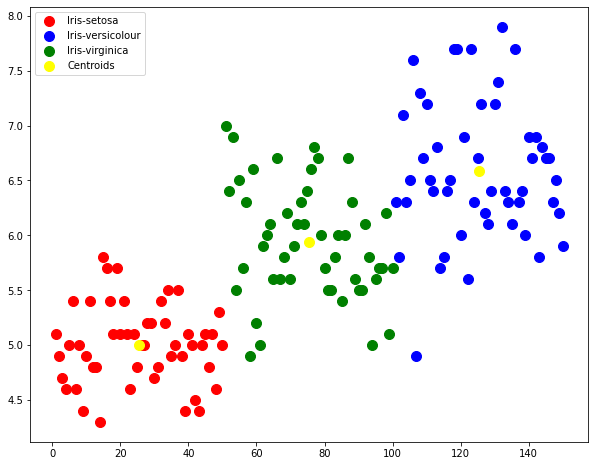

In [14]:
plt.figure(figsize= (10,8))
plt.scatter(iris_df[y_kmeans == 0, 0], iris_df[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(iris_df[y_kmeans == 1, 0], iris_df[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris_df[y_kmeans == 2, 0], iris_df[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show();